In [1]:
import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/Project_Stock/'

os.chdir(current_path)

In [2]:
# !ls

### LOAD OHLCV

In [2]:
def min_max_scaler(x):
    scaled_x = (x - x.min()) / (x.max() - x.min())
    return scaled_x

In [ ]:
!pip install pandas==0.25.3
!pip install pmdarima 

In [4]:
import pickle

interval = '30m'
with open('./arima_result/arima_candi_profit_result_%s.pickle' % interval, 'rb') as f:
  profit_result_dict = pickle.load(f)

print(list(profit_result_dict.keys()))

['2021-02-11 ZECUSDT.xlsx', '2021-02-11 BNBUSDT.xlsx', '2021-02-11 KAVAUSDT.xlsx', '2021-02-11 XTZUSDT.xlsx', '2021-02-11 SXPUSDT.xlsx', '2021-02-11 ONTUSDT.xlsx', '2021-02-11 BANDUSDT.xlsx', '2021-02-11 QTUMUSDT.xlsx', '2021-02-11 NEOUSDT.xlsx', '2021-02-11 DASHUSDT.xlsx', '2021-02-11 ATOMUSDT.xlsx', '2021-02-11 IOTAUSDT.xlsx', '2021-02-11 DOTUSDT.xlsx', '2021-02-11 MKRUSDT.xlsx', '2021-02-11 THETAUSDT.xlsx', '2021-02-11 WAVESUSDT.xlsx', '2021-02-11 BATUSDT.xlsx', '2021-02-11 ZRXUSDT.xlsx', '2021-02-11 SNXUSDT.xlsx', '2021-02-11 ALGOUSDT.xlsx', '2021-02-11 OMGUSDT.xlsx', '2021-02-11 KNCUSDT.xlsx', '2021-02-11 COMPUSDT.xlsx', '2021-02-11 BTCUSDT.xlsx', '2021-02-11 ETHUSDT.xlsx', '2021-02-11 BCHUSDT.xlsx', '2021-02-11 XRPUSDT.xlsx', '2021-02-11 EOSUSDT.xlsx', '2021-02-11 LTCUSDT.xlsx', '2021-02-11 ETCUSDT.xlsx', '2021-02-11 LINKUSDT.xlsx', '2021-02-11 XLMUSDT.xlsx', '2021-02-11 ADAUSDT.xlsx', '2021-02-11 XMRUSDT.xlsx']


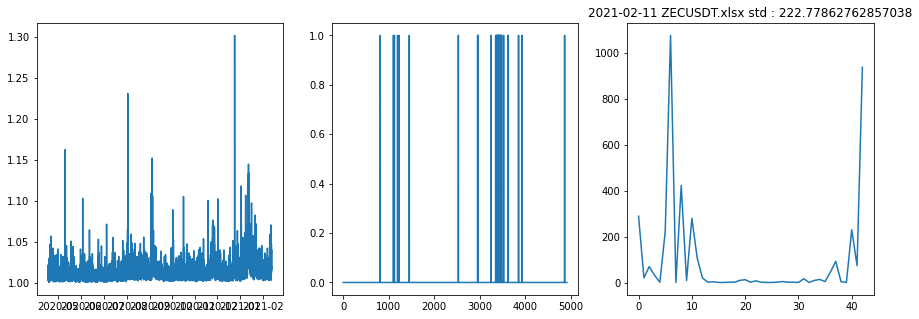

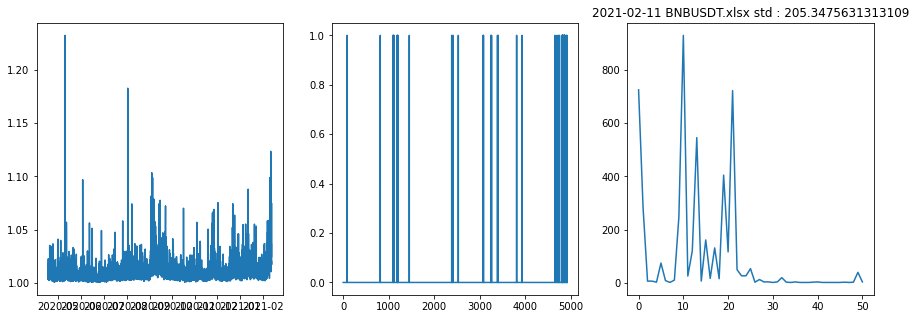

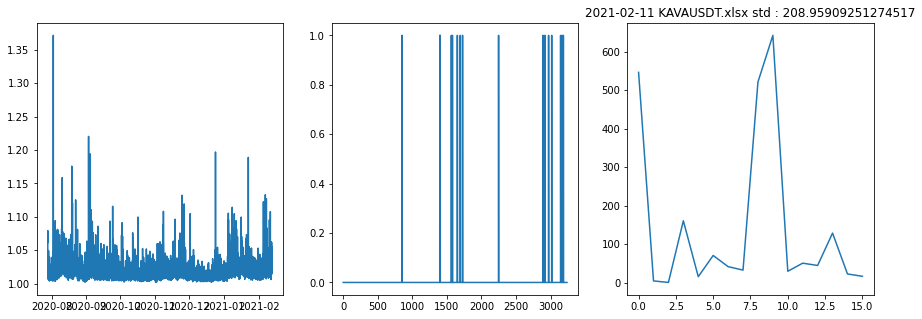

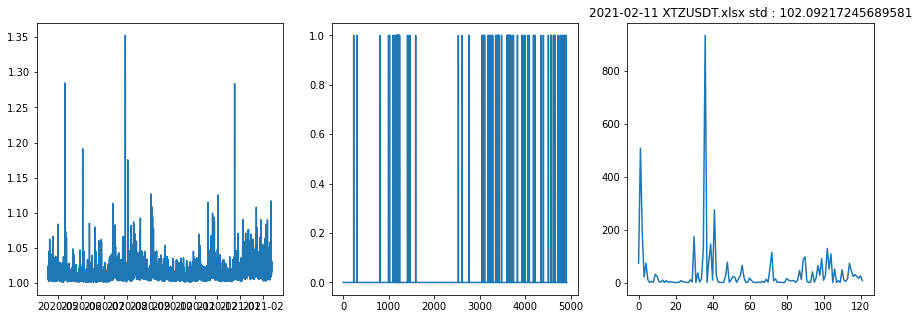

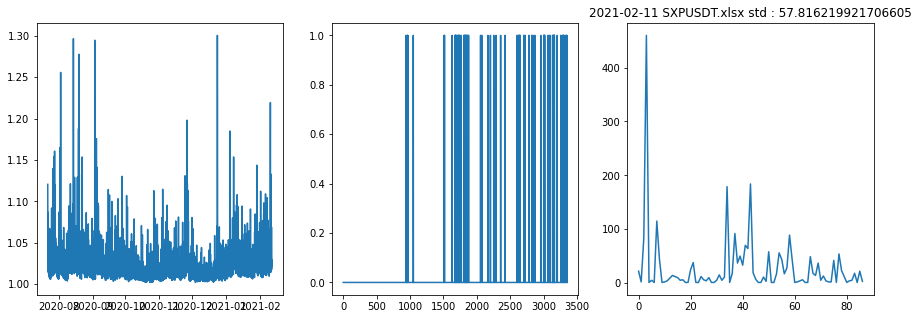

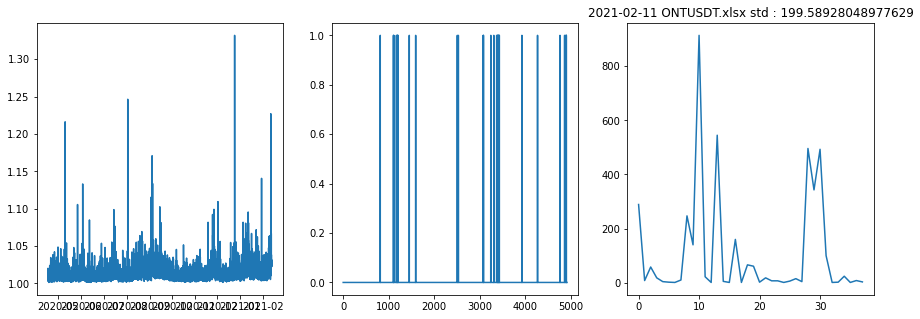

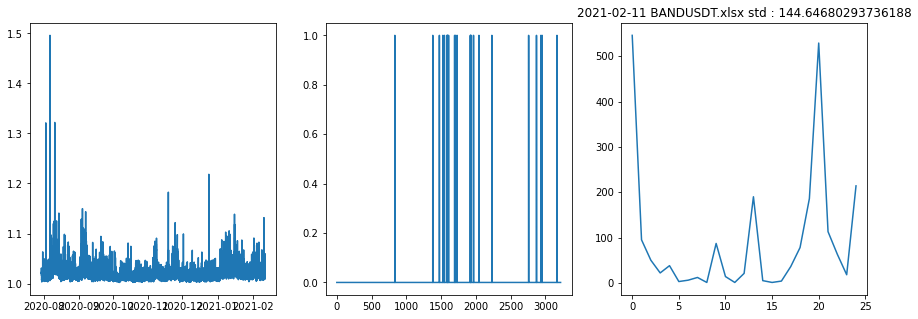

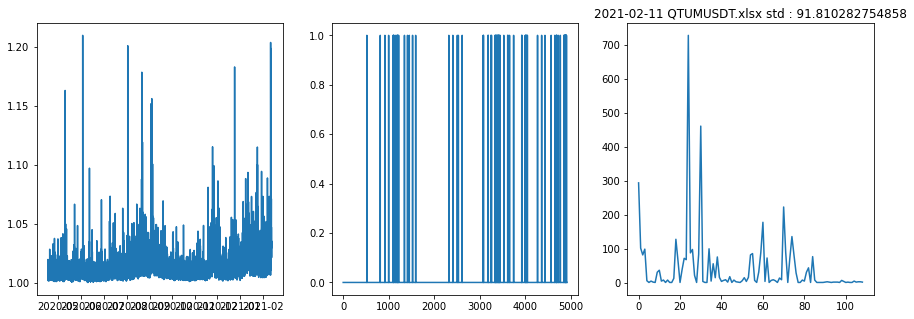

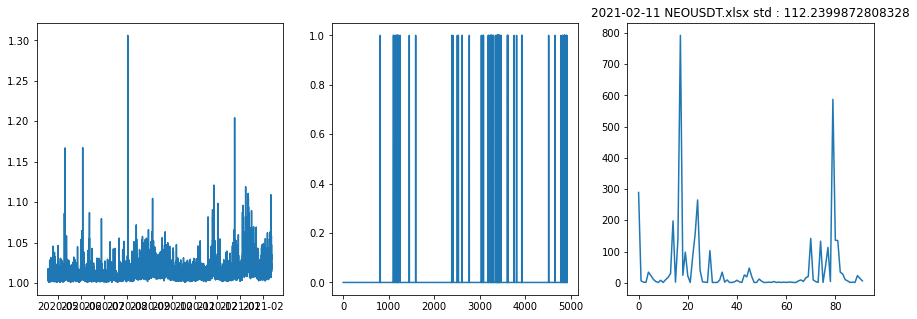

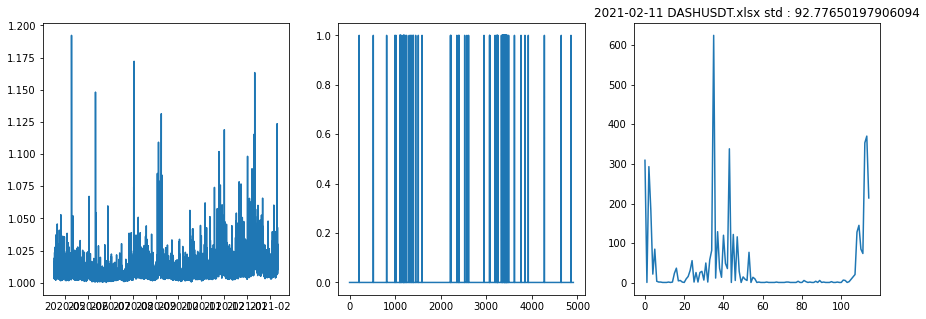

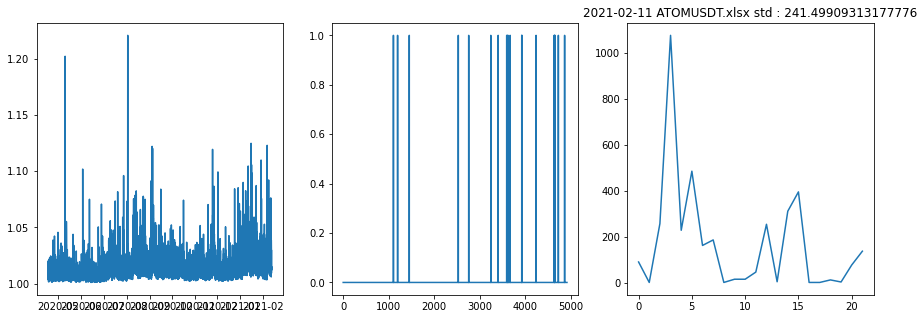

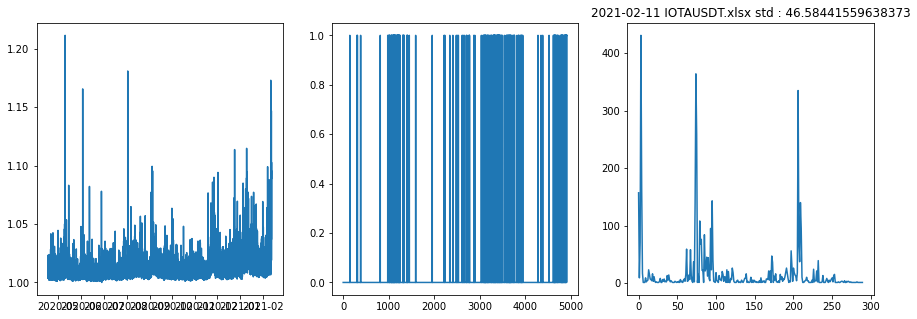

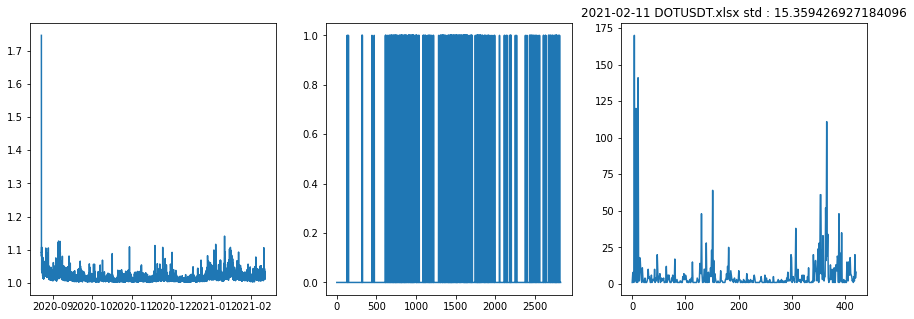

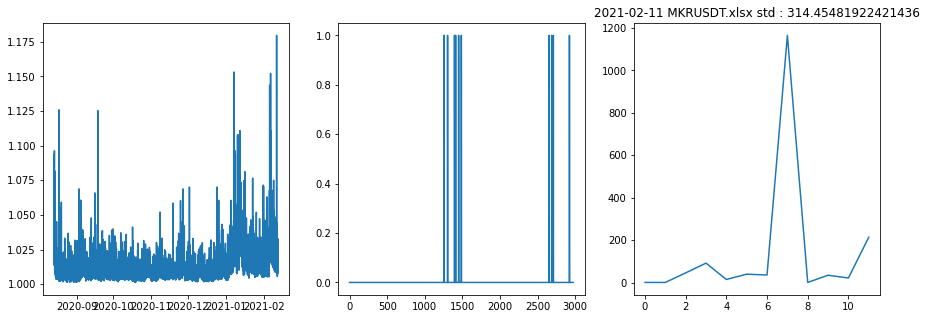

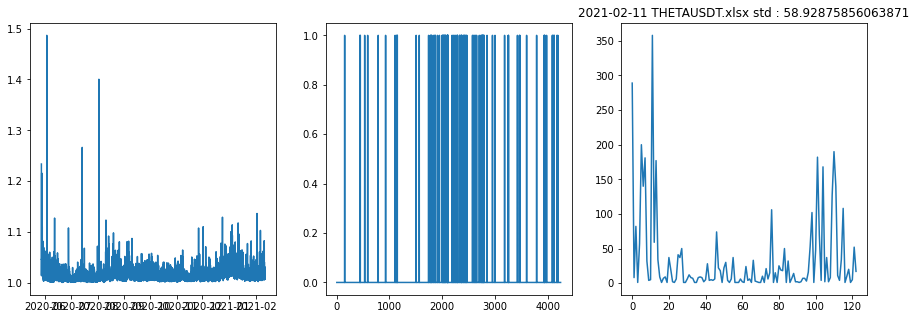

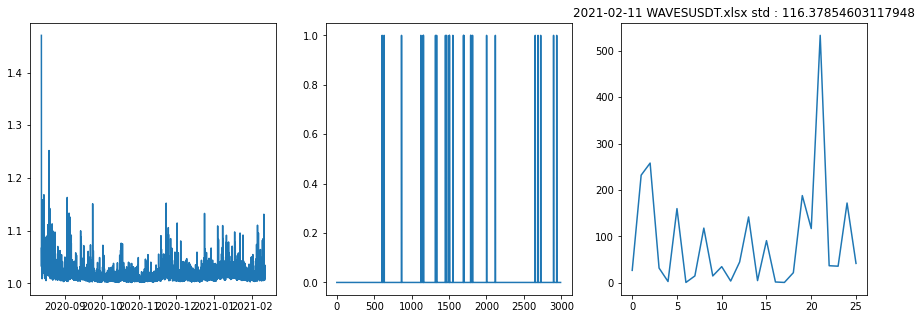

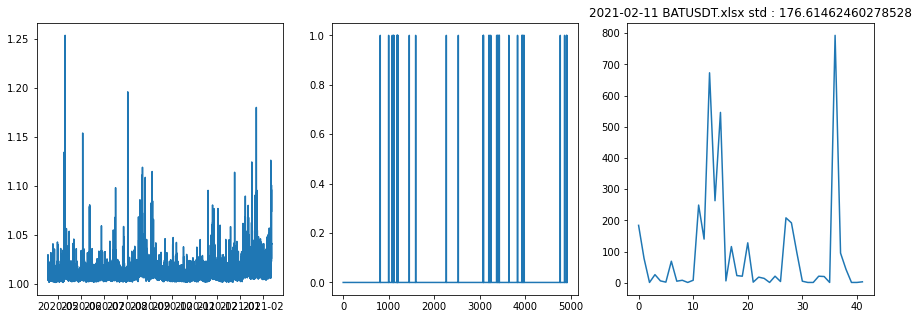

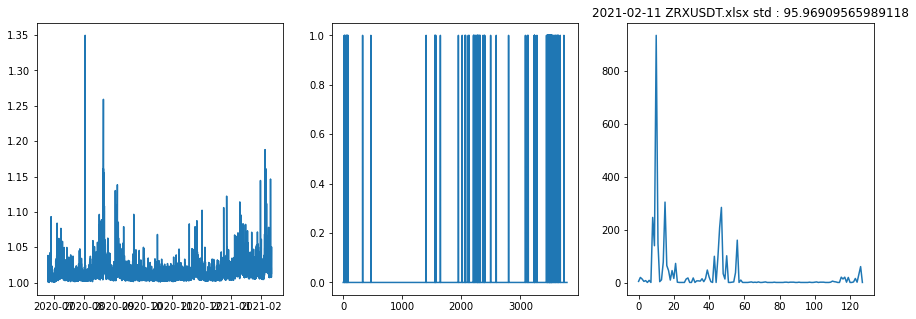

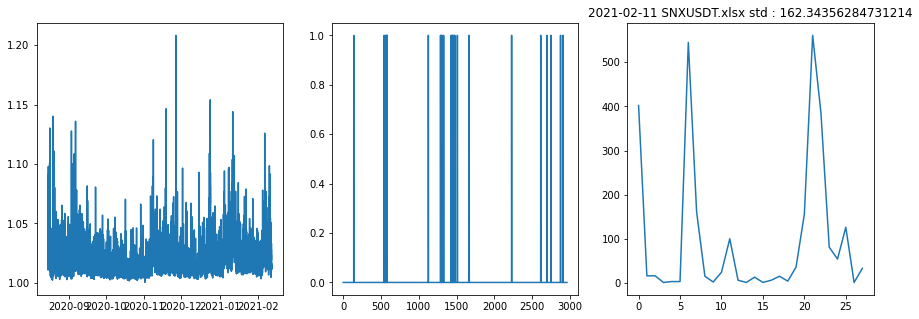

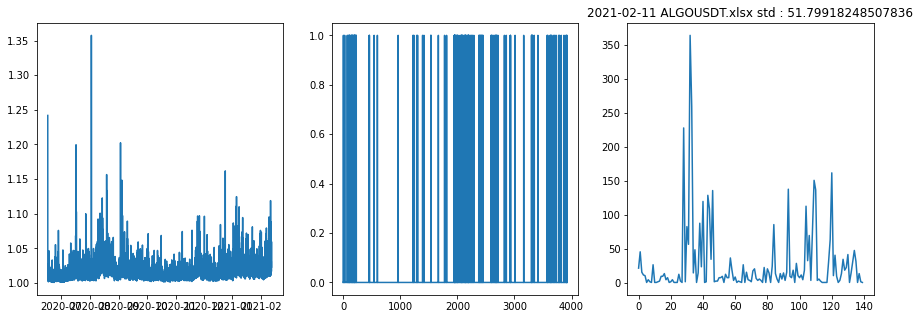

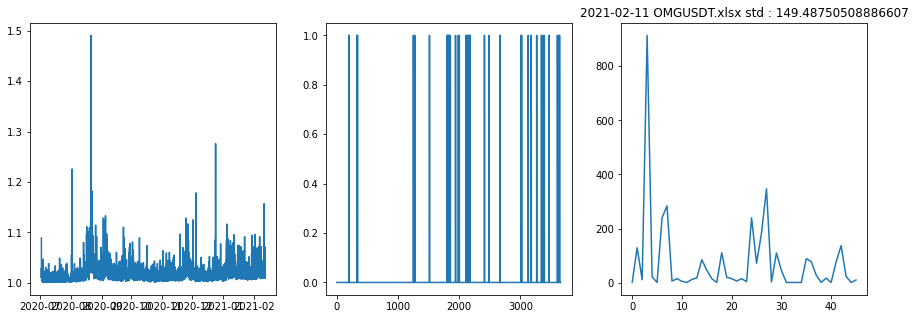

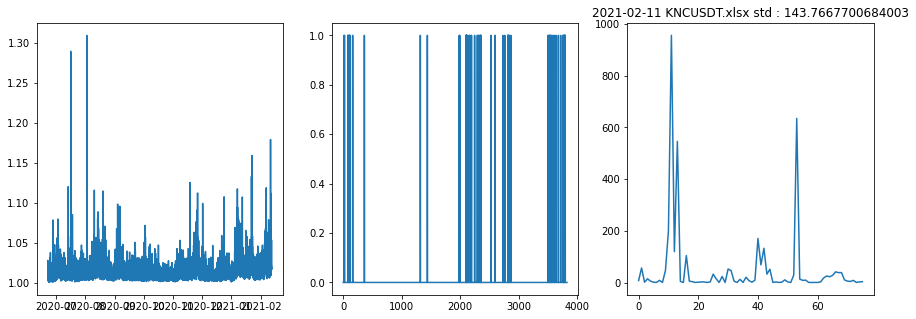

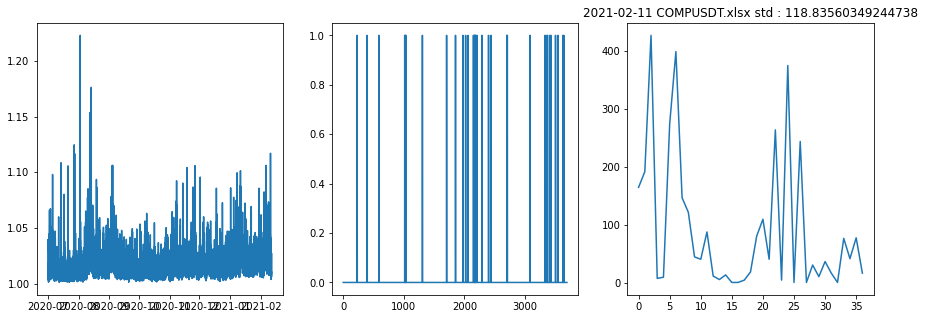

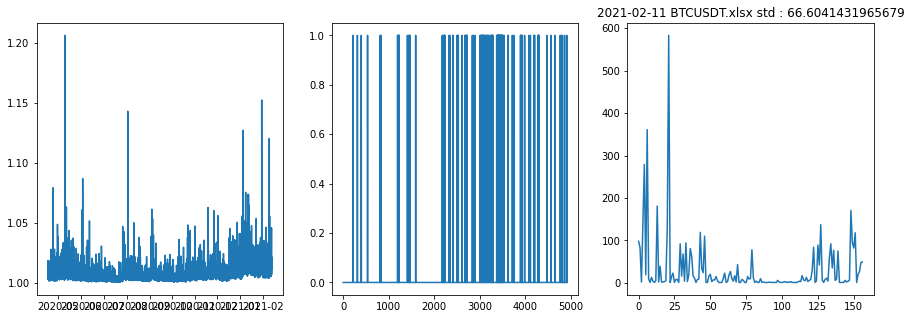

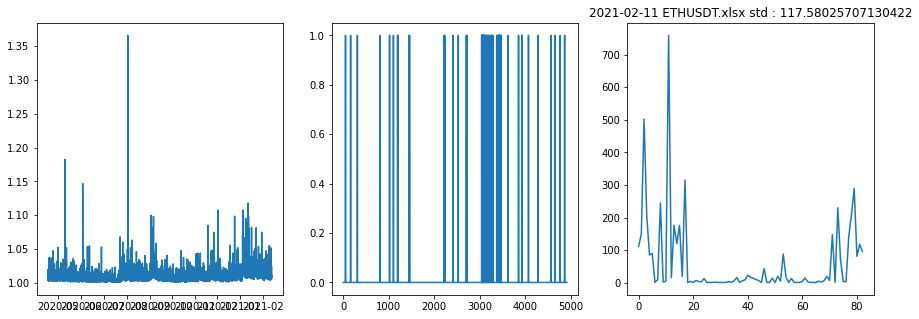

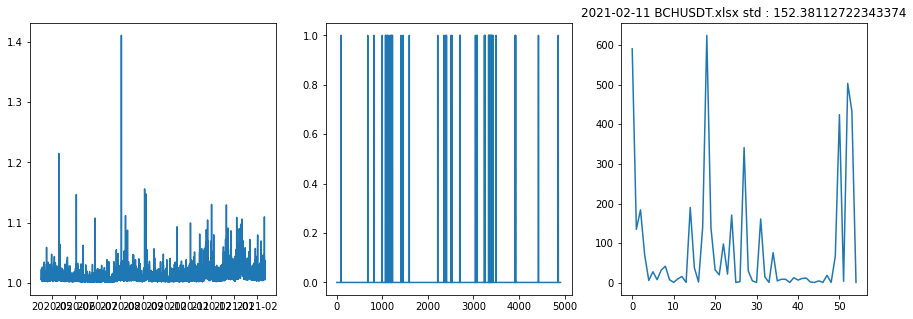

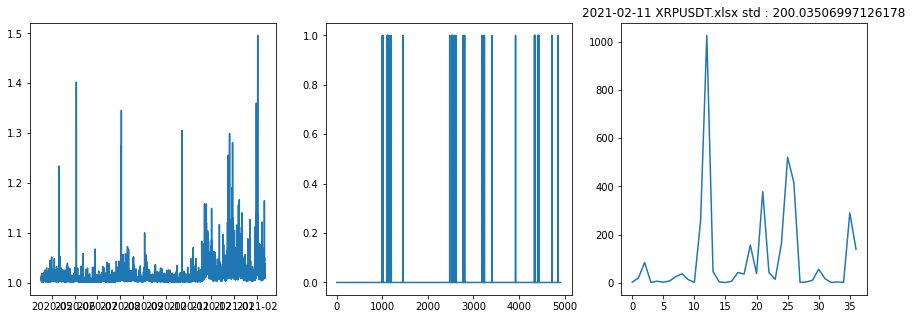

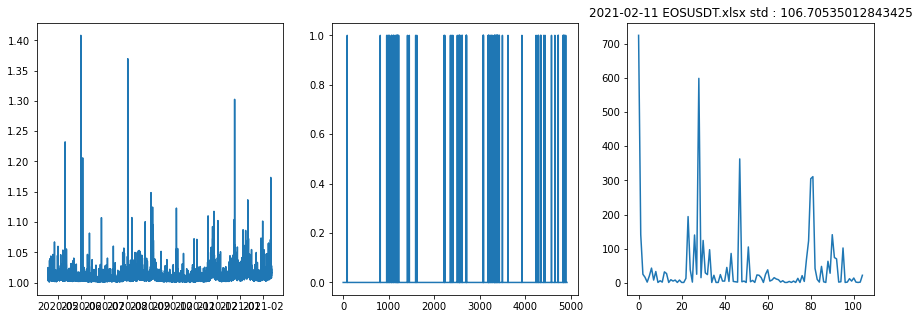

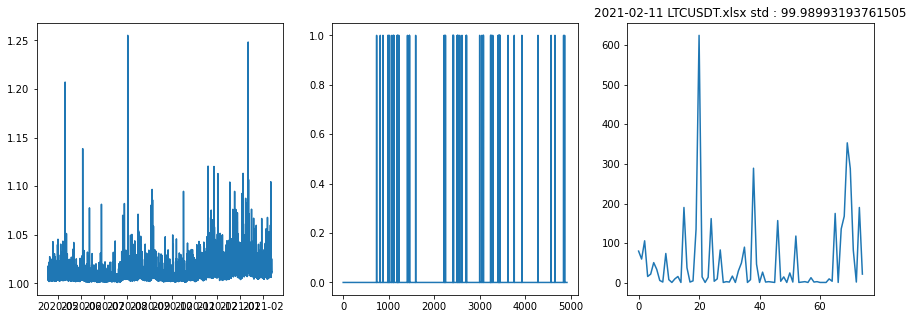

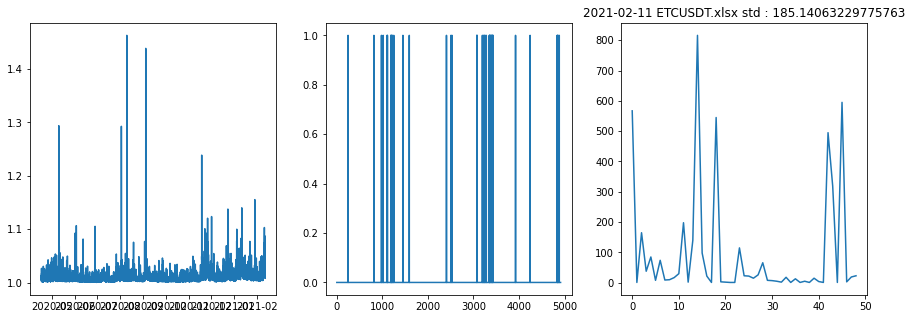

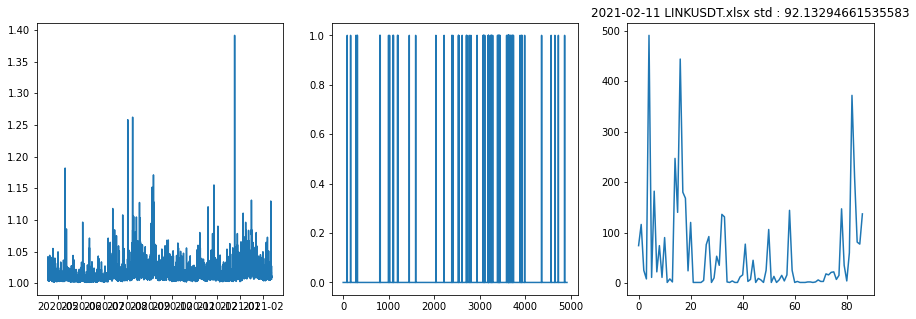

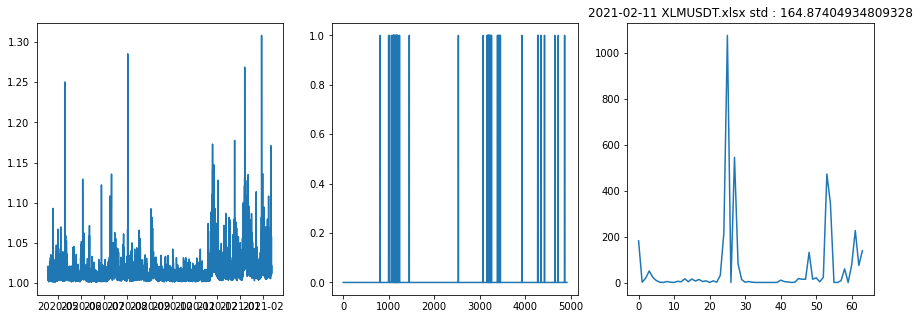

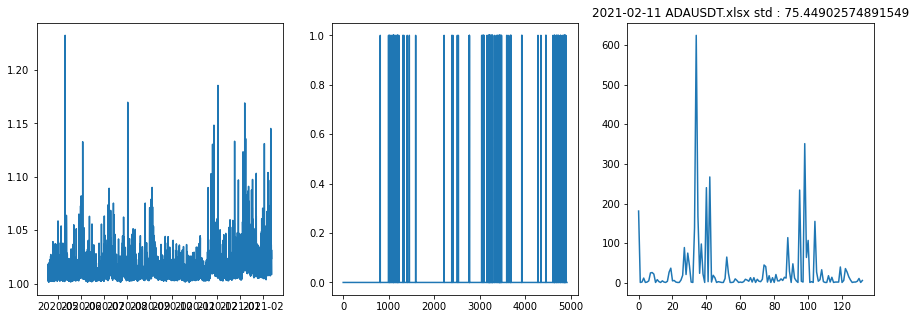

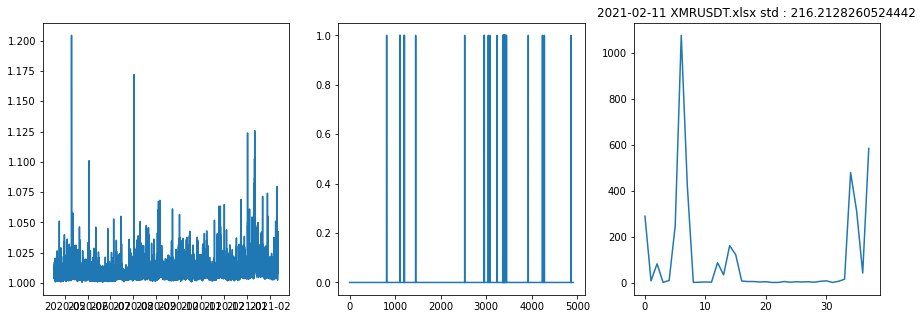

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

keys = list(profit_result_dict.keys())
key = keys[1]
for key in keys:

  try:
    ohlcv = profit_result_dict[key]['ohlcv']
    # print(len(ohlcv))
    # print(ohlcv.head())

    close = ohlcv.iloc[:, [3]]
    fluc = ohlcv['high'] / ohlcv['low']

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(fluc)

    pr_list = profit_result_dict[key]['pr_list']
    # print(sum(pr_list))
    pr_list_fr = list(map(lambda x : 0 if x == 1.0 else 1, pr_list))
    # print(sum(pr_list_fr))
    plt.subplot(132)
    plt.plot(pr_list_fr)
    # plt.show()

    profited_index = np.argwhere(np.array(pr_list_fr) == 1)
    # print(profited_index)

    term_list = list()
    for i in range(len(profited_index) - 1):
      term_list.append(profited_index[i + 1] - profited_index[i])

    # print(term_list)
    plt.subplot(133)
    plt.plot(term_list)
    plt.title('%s std : %s' % (key, np.std(term_list)))
    plt.show()

  except:
    pass


#### **Get span between each traded section**

117.58025707130422


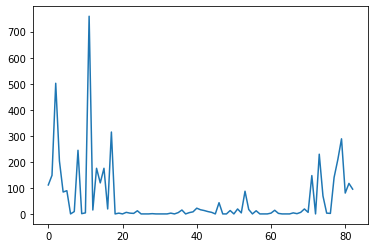

In [37]:
profited_index = np.argwhere(np.array(pr_list_fr) == 1)
# print(profited_index)

term_list = list()
for i in range(len(profited_index) - 1):
  term_list.append(profited_index[i + 1] - profited_index[i])

# print(term_list)
plt.plot(term_list)

print(np.std(term_list))

### ARIMA

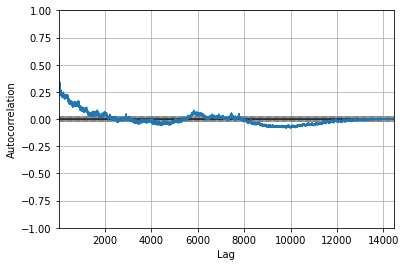

In [7]:
from pandas.plotting import autocorrelation_plot

# plt.figure(figsize=(10, 7), dpi=80)
# plt.subplot(121)
autocorrelation_plot(fluc)
plt.show()


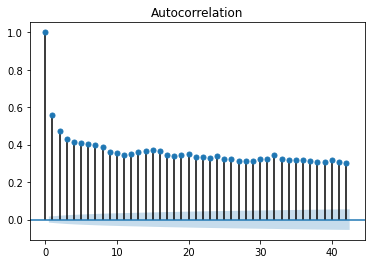

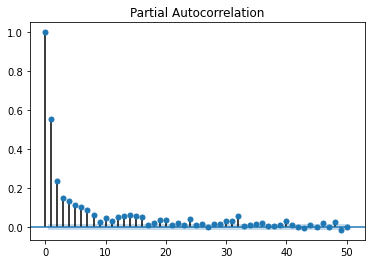

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(fluc)
plt.show()

plot_pacf(fluc, lags=50)
plt.show()

In [9]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(fluc, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-102133.067, Time=26.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-96719.759, Time=2.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-99311.171, Time=3.80 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-101173.468, Time=7.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-96721.759, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-101840.241, Time=21.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-102397.764, Time=27.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-101654.348, Time=8.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-100258.738, Time=7.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-101390.901, Time=25.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-100859.741, Time=5.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-102457.434, Time=38.94 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-102236.967, Time=14.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-102330.938, Ti

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14448
Model:                 ARIMA(4, 1, 1)   Log Likelihood               51259.141
Date:                Sun, 21 Feb 2021   AIC                        -102506.282
Time:                        05:34:13   BIC                        -102460.812
Sample:                    04-17-2020   HQIC                       -102491.168
                         - 02-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2601      0.003     85.343      0.000       0.254       0.266
ar.L2          0.0733      0.003     21.438      0.000       0.067       0.080
ar.L3          0.0105      0.005      1.946      0.0

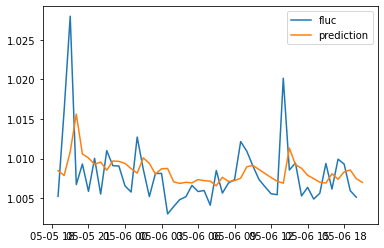

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SARIMAX

model = ARIMA(fluc, order=(4, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
# print(model_fit.plot_predict())

# model_fit.plot_diagnostics(figsize=(15, 15))

# print(model_fit.plot_predict(start=900, end=950))

prediction = model_fit.predict(start=900,end=950,dynamic=False)

plt.plot(fluc[900:950], label='fluc')
plt.plot(prediction, label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

X = close
size = int(len(X) * 0.66)
train, test = X[0:size].values, X[size:len(X)]
test_shift = test.shift(1).values
test = test.values
# break
ㄴ
history = list(train)
# print(train)
# print(history)
# break
# pred = model_fit.predict()
# print(pred)
# print(model_fit.forecast())
# print(len(close), len(pred))
# test_pred = pred[-len(test):]
predictions = list()
err_ranges = list()
for t in range(len(test)):
    model = ARIMAX(history, order=(2, 1, 2))
    # model = ARIMA(history, order=(0, 2, 1))
    model_fit = model.fit()
    # output = model_fit.forecast()
    output = model_fit.get_forecast()
    # print(output)
    # break
    yhat = output.predicted_mean
    predictions.append(yhat)
    err_ranges.append(output.se_mean)
    print(output.se_mean)

    obs = test[t]
    # print('obs :', obs)
    history.append(obs)
    # break
    print('\r %.2f%%' % (t / len(test) * 100), end='')

[7.19366883]
 0.00%[7.19878618]
 33.33%[7.20019558]
 66.67%

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 123.506


### PREDICTION

In [ ]:
# pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
# pred_ci = pred.conf_int()
# model_fit.get_prediction()

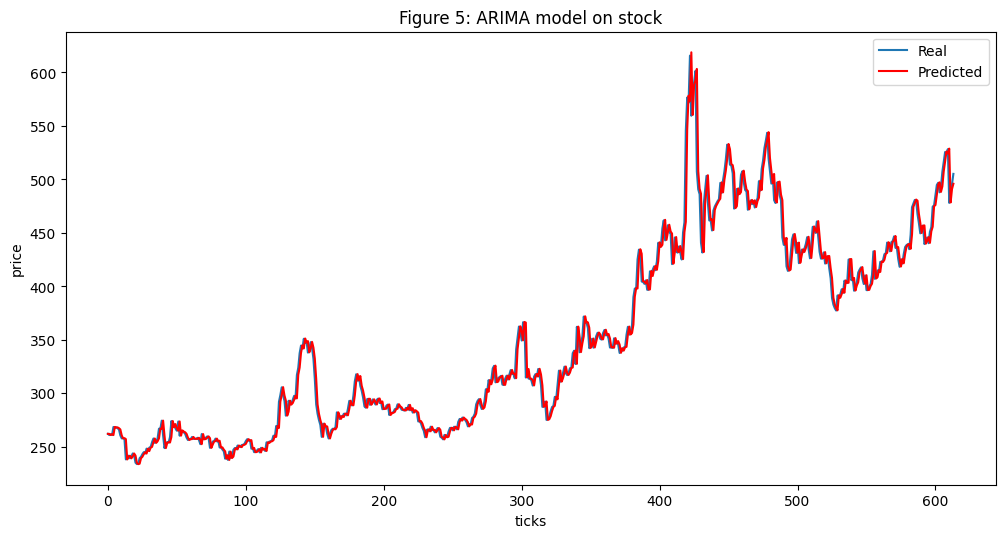

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('ticks')
plt.ylabel('price')
plt.title('Figure 5: ARIMA model on stock')
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=(12, 6), dpi=100)
# # plt.plot(test[:100], label='Real')
# plt.plot(test_shift[:100], label='Shift')
# plt.plot(predictions[:100], color='red', label='Predicted')
# plt.xlabel('ticks')
# plt.ylabel('price')
# plt.title('Figure 5: ARIMA model on stock')
# plt.legend()
# plt.show()

In [ ]:
import numpy as np
# plt.plot(test_shift[:100], label='Shift')
# plt.plot(predictions[:100], color='red', label='Predicted')
print(np.hstack((test_shift[:5], predictions[:5])))

[[         nan 262.16252564]
 [262.14       262.16056984]
 [261.04       261.05765582]
 [261.83       261.84874815]
 [261.02       261.03737709]]


### **Back-Test**

614 614


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


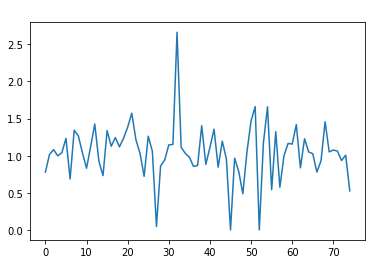

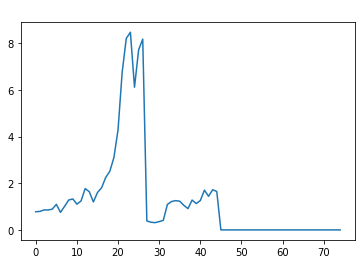

(0.6133333333333333, 0.12214983713355049, array([0.]))

In [ ]:
print(len(test), len(predictions))

high, low = np.split(ohlcv.values[-len(test):, [1, 2]], 2, axis=1)
# print(high)


def get_back_result(tp=0.04, leverage=1, show_detail=False, show_plot=False):

  fee = 0.0006
  profits = list()
  win_cnt = 0
  for i in range(len(test)):

    long_ep = (predictions[i] - err_ranges[i]) * (1 / (tp + 1))
    short_ep = (predictions[i] + err_ranges[i]) * (1 / (1 - tp))
    # print((low[i]))
    if low[i] < long_ep:
      profit = test[i] / long_ep - fee
      l_profit = 1 + (profit - 1) * leverage
      l_profit = max(l_profit, 0)
      profits.append(l_profit)
      if show_detail:
        print(test[i], predictions[i], long_ep)

      if profit >= 1:
        win_cnt += 1

    elif high[i] > short_ep:
      profit = short_ep / test[i] - fee
      l_profit = 1 + (profit - 1) * leverage
      l_profit = max(l_profit, 0)
      profits.append(l_profit)
      if show_detail:
        print(test[i], predictions[i], short_ep)
        
      if profit >= 1:
        win_cnt += 1

  win_ratio = win_cnt / len(profits)
  frequency = len(profits) / len(test)
  accum_profit = np.array(profits).cumprod()

  # print(win_ratio)

  if show_plot:
    plt.plot(profits)
    plt.title('Win Ratio : %.2f %% Frequency : %.2f %%' % (win_ratio * 100, frequency * 100), color='white')
    plt.show()

    # print()
    plt.plot(accum_profit)
    plt.title('Accum_profit : %.2f' % accum_profit[-1], color='white')
    plt.show()

  return win_ratio, frequency, accum_profit[-1]


get_back_result(tp=0.04, leverage=10, show_plot=True)


### **Back-Test Analyze**

#### by tp

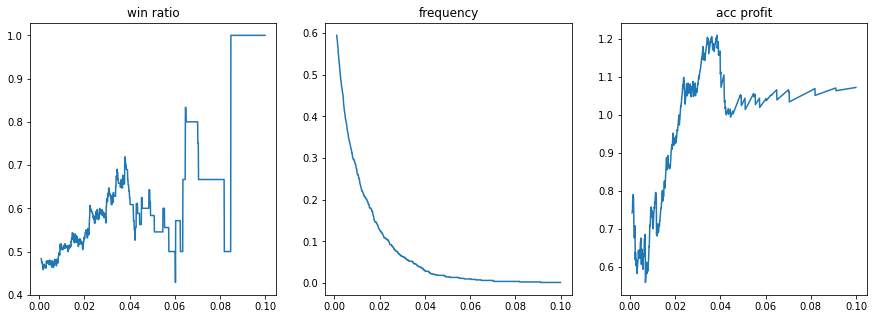

In [ ]:
tp_list = np.arange(0.001, 0.1, 0.0001)
wr_list, fr_list, ap_list = list(), list(), list()
for tp in tp_list:

  try:
    result = get_back_result(tp=tp)
    wr_list.append(result[0])
    fr_list.append(result[1])
    ap_list.append(result[2])

  except Exception as e:
    print(e)
    break

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(tp_list[:len(ap_list)], wr_list)
plt.title('win ratio')

plt.subplot(132)
plt.plot(tp_list[:len(ap_list)], fr_list)
plt.title('frequency')

plt.subplot(133)
plt.plot(tp_list[:len(ap_list)], ap_list)
plt.title('acc profit')

plt.show()

#### by leverage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


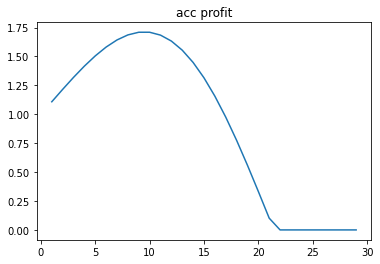

In [ ]:
leverage_list = np.arange(1, 30, 1)
wr_list, fr_list, ap_list = list(), list(), list()
for leverage in leverage_list:

  try:
    result = get_back_result(tp=0.04, leverage=leverage)
    wr_list.append(result[0])
    fr_list.append(result[1])
    ap_list.append(result[2])

  except Exception as e:
    print(e)
    break

plt.plot(leverage_list[:len(ap_list)], ap_list)
plt.title('acc profit')

plt.show()

824


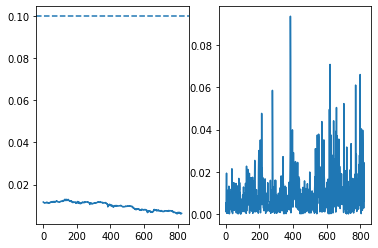

In [ ]:
errors = np.array(err_ranges) / np.array(test)
real_errors = abs(np.array(test - predictions) / np.array(test))

# print((test - predictions)[:5])
print(len(errors))
plt.subplot(121)
plt.axhline(tp, linestyle='--')
plt.plot(errors)

plt.subplot(122)
plt.plot(real_errors)
plt.show()

### **ARIMA on Profit**

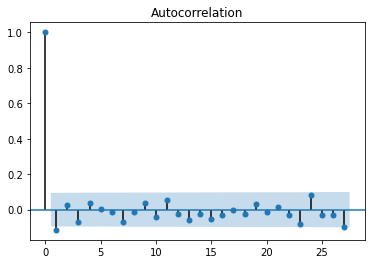

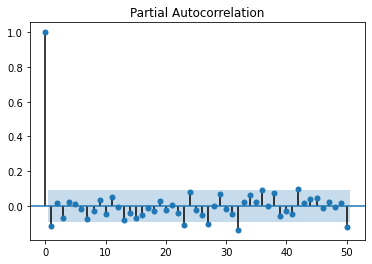

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(np.array(profits))
plt.show()

plot_pacf(np.array(profits), lags=50)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  434
Model:                     ARMA(4, 1)   Log Likelihood                1293.012
Method:                       css-mle   S.D. of innovations              0.012
Date:                Thu, 11 Feb 2021   AIC                          -2572.025
Time:                        01:39:59   BIC                          -2543.513
Sample:                             0   HQIC                         -2560.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.001   1930.007      0.000       0.999       1.001
ar.L1.y        0.0254      0.895      0.028      0.977      -1.730       1.781
ar.L2.y        0.0224      0.111      0.203      0.8

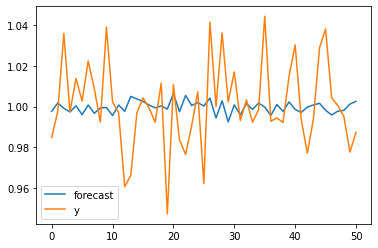

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(profits, order=(4, 0, 1))
model_fit = model.fit(trend='c', disp=5)
print(model_fit.summary())
# print(model_fit.plot_predict())
print(model_fit.plot_predict(start=50, end=100))
